<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-kamilla-jaroslav/blob/main/cyclegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dat

In [1]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')


zip_file = "/content/drive/MyDrive/aada/processed_images.zip"


output_folder = "/content/processed_images (3)"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print(f"Data in {output_folder}")

Mounted at /content/drive
Data in /content/processed_images (3)


In [2]:
%%capture
!pip install torch torchvision matplotlib pytorch_ssim
!pip install torch --upgrade

# Rozdělení dat

In [3]:
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch


class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])
        image = (image - 0.5) * 2
        image = np.expand_dims(image, axis=0).astype(np.float32)

        if self.transform:
            image = self.transform(image)

        return torch.tensor(image)


simulation_dir = "/content/processed_images (3)/processed_images/processed_simulation_images_12"
experiment_dir = "/content/processed_images (3)/processed_images/processed_experiment_images_12"
test_ratio = 0.2
val_ratio = 0.2

simulation_paths = [os.path.join(simulation_dir, f) for f in os.listdir(simulation_dir) if f.endswith(".npy")]
experiment_paths = [os.path.join(experiment_dir, f) for f in os.listdir(experiment_dir) if f.endswith(".npy")]

sim_train, sim_test = train_test_split(simulation_paths, test_size=test_ratio, random_state=42)
sim_train, sim_val = train_test_split(sim_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

exp_train, exp_test = train_test_split(experiment_paths, test_size=test_ratio, random_state=42)
exp_train, exp_val = train_test_split(exp_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

sim_train_dataset = ImageDataset(sim_train)
sim_val_dataset = ImageDataset(sim_val)
sim_test_dataset = ImageDataset(sim_test)

exp_train_dataset = ImageDataset(exp_train)
exp_val_dataset = ImageDataset(exp_val)
exp_test_dataset = ImageDataset(exp_test)

sim_train_loader = DataLoader(sim_train_dataset, batch_size=16, shuffle=True)
sim_val_loader = DataLoader(sim_val_dataset, batch_size=16, shuffle=False)
sim_test_loader = DataLoader(sim_test_dataset, batch_size=16, shuffle=False)

exp_train_loader = DataLoader(exp_train_dataset, batch_size=16, shuffle=True)
exp_val_loader = DataLoader(exp_val_dataset, batch_size=16, shuffle=False)
exp_test_loader = DataLoader(exp_test_dataset, batch_size=16, shuffle=False)

print(f"Simulation train size: {len(sim_train_dataset)}")
print(f"Simulation val size: {len(sim_val_dataset)}")
print(f"Simulation test size: {len(sim_test_dataset)}")
print(f"Experiment train size: {len(exp_train_dataset)}")
print(f"Experiment val size: {len(exp_val_dataset)}")
print(f"Experiment test size: {len(exp_test_dataset)}")


Simulation train size: 1592
Simulation val size: 531
Simulation test size: 531
Experiment train size: 1500
Experiment val size: 500
Experiment test size: 500


# Model

Epoch [1/301], Generator Loss: 3.551158905029297, Discriminator Loss: 0.011692611500620842
Weights saved for epoch 0


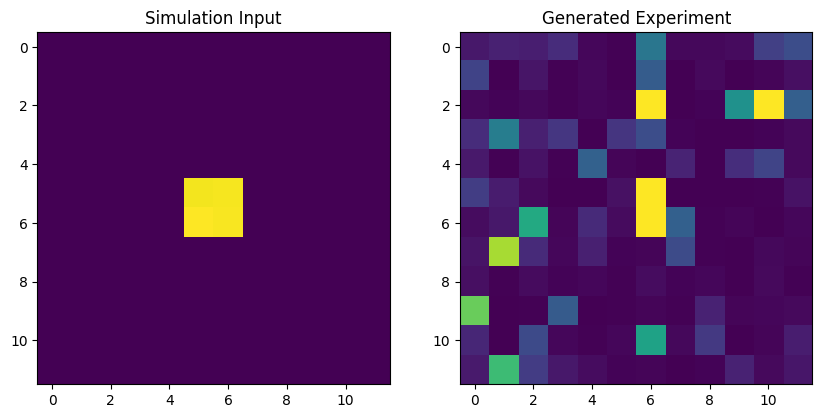

Epoch [2/301], Generator Loss: 2.876593589782715, Discriminator Loss: 0.0016496218740940094
Epoch [3/301], Generator Loss: 2.2983665466308594, Discriminator Loss: 0.006253642030060291
Epoch [4/301], Generator Loss: 1.9102754592895508, Discriminator Loss: 0.02168489247560501
Epoch [5/301], Generator Loss: 2.151277542114258, Discriminator Loss: 0.00037401349982246757
Epoch [6/301], Generator Loss: 2.2945504188537598, Discriminator Loss: 0.0030857448000460863
Epoch [7/301], Generator Loss: 2.1456658840179443, Discriminator Loss: 0.0014633446699008346
Epoch [8/301], Generator Loss: 2.201847791671753, Discriminator Loss: 0.0016103433445096016
Epoch [9/301], Generator Loss: 2.0293023586273193, Discriminator Loss: 0.005151363089680672
Epoch [10/301], Generator Loss: 2.0959014892578125, Discriminator Loss: 0.001643993891775608
Epoch [11/301], Generator Loss: 2.3037867546081543, Discriminator Loss: 0.0008355021709576249
Weights saved for epoch 10


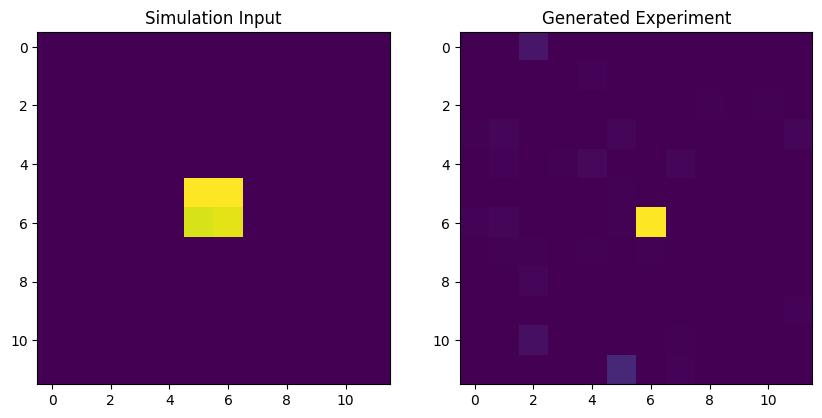

Epoch [12/301], Generator Loss: 2.354775905609131, Discriminator Loss: 0.005689401179552078
Epoch [13/301], Generator Loss: 2.203530788421631, Discriminator Loss: 0.0004799775197170675
Epoch [14/301], Generator Loss: 2.1514110565185547, Discriminator Loss: 0.0006799969123676419
Epoch [15/301], Generator Loss: 2.3569765090942383, Discriminator Loss: 0.001947819022461772
Epoch [16/301], Generator Loss: 1.1797473430633545, Discriminator Loss: 0.16779190301895142
Epoch [17/301], Generator Loss: 1.326945185661316, Discriminator Loss: 0.08708379417657852
Epoch [18/301], Generator Loss: 0.8509836792945862, Discriminator Loss: 0.21955911815166473
Epoch [19/301], Generator Loss: 0.9652919769287109, Discriminator Loss: 0.22266912460327148
Epoch [20/301], Generator Loss: 1.1478705406188965, Discriminator Loss: 0.18716174364089966
Epoch [21/301], Generator Loss: 1.318505048751831, Discriminator Loss: 0.13582530617713928
Weights saved for epoch 20


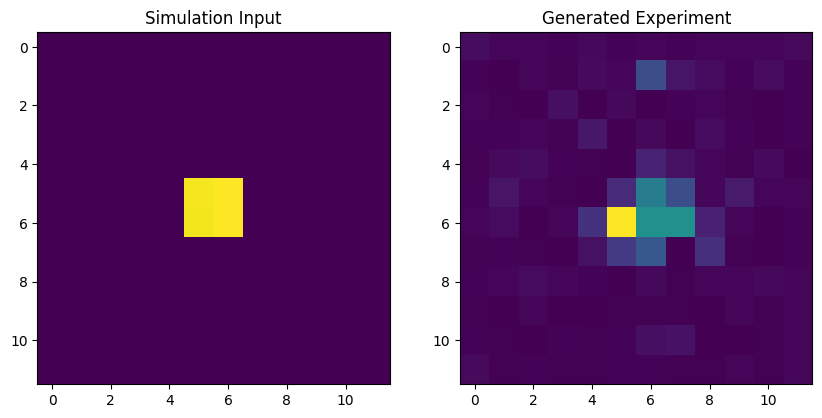

Epoch [22/301], Generator Loss: 2.2914817333221436, Discriminator Loss: 0.014523603953421116
Epoch [23/301], Generator Loss: 1.200868844985962, Discriminator Loss: 0.19752582907676697
Epoch [24/301], Generator Loss: 0.8811421990394592, Discriminator Loss: 0.20470735430717468
Epoch [25/301], Generator Loss: 1.0391303300857544, Discriminator Loss: 0.16377905011177063
Epoch [26/301], Generator Loss: 0.9773680567741394, Discriminator Loss: 0.17087027430534363
Epoch [27/301], Generator Loss: 0.9539260864257812, Discriminator Loss: 0.15559768676757812
Epoch [28/301], Generator Loss: 1.017569661140442, Discriminator Loss: 0.18086007237434387
Epoch [29/301], Generator Loss: 0.647061824798584, Discriminator Loss: 0.22337763011455536
Epoch [30/301], Generator Loss: 1.056027889251709, Discriminator Loss: 0.126460999250412
Epoch [31/301], Generator Loss: 0.8177376985549927, Discriminator Loss: 0.22884583473205566
Weights saved for epoch 30


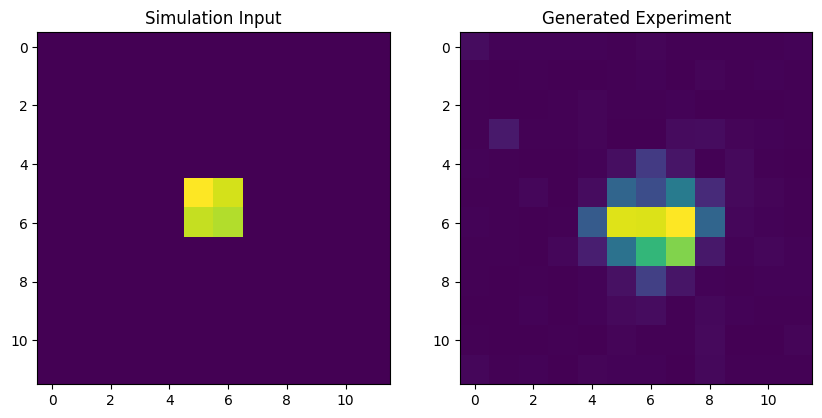

Epoch [32/301], Generator Loss: 0.7598714828491211, Discriminator Loss: 0.20438683032989502
Epoch [33/301], Generator Loss: 0.5296555161476135, Discriminator Loss: 0.2637186646461487
Epoch [34/301], Generator Loss: 0.6448788046836853, Discriminator Loss: 0.22289016842842102
Epoch [35/301], Generator Loss: 0.6034373044967651, Discriminator Loss: 0.23162469267845154
Epoch [36/301], Generator Loss: 0.6674037575721741, Discriminator Loss: 0.22126756608486176
Epoch [37/301], Generator Loss: 0.6682937145233154, Discriminator Loss: 0.22386808693408966
Epoch [38/301], Generator Loss: 0.6236216425895691, Discriminator Loss: 0.22686602175235748
Epoch [39/301], Generator Loss: 0.6344209909439087, Discriminator Loss: 0.21088480949401855
Epoch [40/301], Generator Loss: 0.6554670333862305, Discriminator Loss: 0.21661797165870667
Epoch [41/301], Generator Loss: 0.6426793336868286, Discriminator Loss: 0.2148204743862152
Weights saved for epoch 40


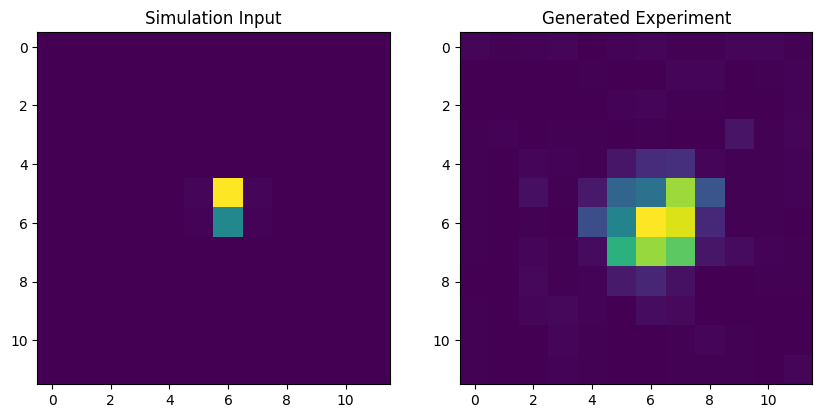

Epoch [42/301], Generator Loss: 0.807607114315033, Discriminator Loss: 0.1934882551431656
Epoch [43/301], Generator Loss: 0.6548839211463928, Discriminator Loss: 0.22079062461853027
Epoch [44/301], Generator Loss: 0.5148867964744568, Discriminator Loss: 0.2456047534942627
Epoch [45/301], Generator Loss: 0.7172796130180359, Discriminator Loss: 0.2050096094608307
Epoch [46/301], Generator Loss: 0.5550951361656189, Discriminator Loss: 0.2691463828086853
Epoch [47/301], Generator Loss: 0.6998194456100464, Discriminator Loss: 0.23501211404800415
Epoch [48/301], Generator Loss: 0.8246250152587891, Discriminator Loss: 0.20330224931240082
Epoch [49/301], Generator Loss: 0.7039634585380554, Discriminator Loss: 0.19446231424808502
Epoch [50/301], Generator Loss: 0.5915283560752869, Discriminator Loss: 0.21812628209590912
Epoch [51/301], Generator Loss: 0.8491322994232178, Discriminator Loss: 0.19712033867835999
Weights saved for epoch 50


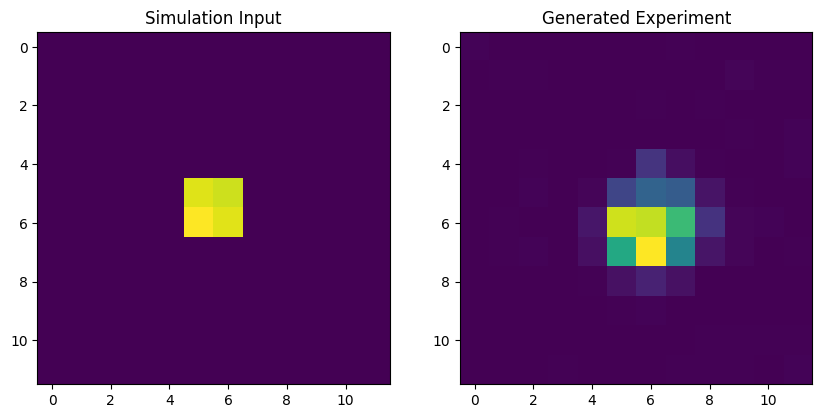

Epoch [52/301], Generator Loss: 0.6629496812820435, Discriminator Loss: 0.2064453661441803
Epoch [53/301], Generator Loss: 0.7687317132949829, Discriminator Loss: 0.2008122205734253
Epoch [54/301], Generator Loss: 0.7648847699165344, Discriminator Loss: 0.1849648803472519
Epoch [55/301], Generator Loss: 0.7561835050582886, Discriminator Loss: 0.18420077860355377
Epoch [56/301], Generator Loss: 0.8297718167304993, Discriminator Loss: 0.18086737394332886
Epoch [57/301], Generator Loss: 0.9075077772140503, Discriminator Loss: 0.18497690558433533
Epoch [58/301], Generator Loss: 0.9703241586685181, Discriminator Loss: 0.20088115334510803
Epoch [59/301], Generator Loss: 1.1040349006652832, Discriminator Loss: 0.2151639461517334
Epoch [60/301], Generator Loss: 0.7305436730384827, Discriminator Loss: 0.20739015936851501
Epoch [61/301], Generator Loss: 0.8166901469230652, Discriminator Loss: 0.17027819156646729
Weights saved for epoch 60


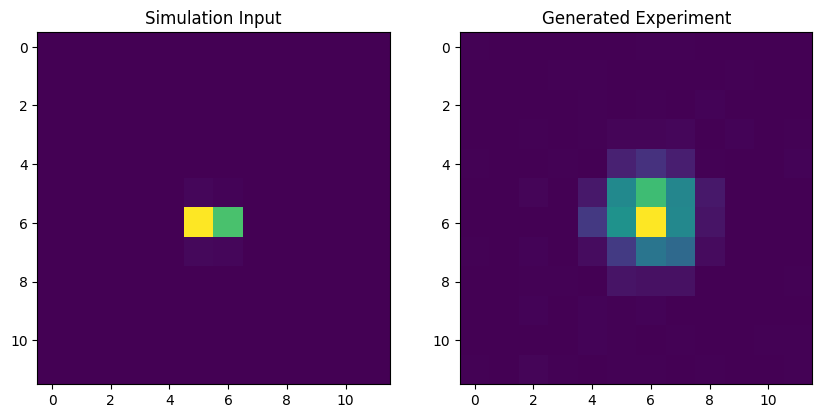

Epoch [62/301], Generator Loss: 1.1216663122177124, Discriminator Loss: 0.18913903832435608
Epoch [63/301], Generator Loss: 1.1283494234085083, Discriminator Loss: 0.1770399510860443
Epoch [64/301], Generator Loss: 1.0285090208053589, Discriminator Loss: 0.18244951963424683
Epoch [65/301], Generator Loss: 1.247641921043396, Discriminator Loss: 0.17757493257522583
Epoch [66/301], Generator Loss: 0.7976694107055664, Discriminator Loss: 0.1735610067844391
Epoch [67/301], Generator Loss: 0.827486515045166, Discriminator Loss: 0.19024814665317535
Epoch [68/301], Generator Loss: 0.8852732181549072, Discriminator Loss: 0.1831948459148407
Epoch [69/301], Generator Loss: 1.1076070070266724, Discriminator Loss: 0.1938251256942749
Epoch [70/301], Generator Loss: 0.6828085780143738, Discriminator Loss: 0.20738567411899567
Epoch [71/301], Generator Loss: 0.6134119033813477, Discriminator Loss: 0.20466849207878113
Weights saved for epoch 70


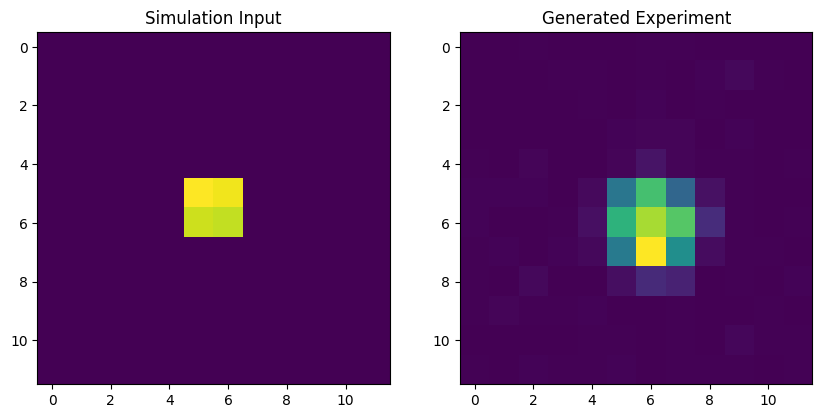

Epoch [72/301], Generator Loss: 0.6798110008239746, Discriminator Loss: 0.20874589681625366
Epoch [73/301], Generator Loss: 0.783547043800354, Discriminator Loss: 0.22124961018562317
Epoch [74/301], Generator Loss: 0.7437047958374023, Discriminator Loss: 0.204423725605011
Epoch [75/301], Generator Loss: 0.9172232151031494, Discriminator Loss: 0.2131144404411316
Epoch [76/301], Generator Loss: 0.657405436038971, Discriminator Loss: 0.2200181484222412
Epoch [77/301], Generator Loss: 0.759181559085846, Discriminator Loss: 0.23612092435359955
Epoch [78/301], Generator Loss: 0.5558207631111145, Discriminator Loss: 0.24437056481838226
Epoch [79/301], Generator Loss: 0.6815248131752014, Discriminator Loss: 0.270047664642334
Epoch [80/301], Generator Loss: 0.6427075862884521, Discriminator Loss: 0.24346596002578735
Epoch [81/301], Generator Loss: 0.7917672991752625, Discriminator Loss: 0.21034328639507294
Weights saved for epoch 80


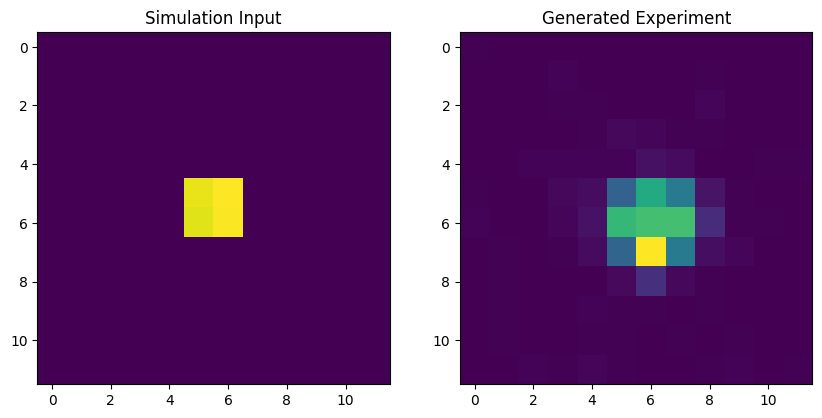

Epoch [82/301], Generator Loss: 0.5964728593826294, Discriminator Loss: 0.23597344756126404
Epoch [83/301], Generator Loss: 0.705632209777832, Discriminator Loss: 0.2057272344827652
Epoch [84/301], Generator Loss: 0.5675840973854065, Discriminator Loss: 0.2545313537120819
Epoch [85/301], Generator Loss: 0.638526201248169, Discriminator Loss: 0.2569504380226135
Epoch [86/301], Generator Loss: 0.6527343392372131, Discriminator Loss: 0.2560647130012512
Epoch [87/301], Generator Loss: 0.61751389503479, Discriminator Loss: 0.2456725835800171
Epoch [88/301], Generator Loss: 0.6453085541725159, Discriminator Loss: 0.21490836143493652
Epoch [89/301], Generator Loss: 0.6782907843589783, Discriminator Loss: 0.22310855984687805
Epoch [90/301], Generator Loss: 0.7224063873291016, Discriminator Loss: 0.25291669368743896
Epoch [91/301], Generator Loss: 0.5604055523872375, Discriminator Loss: 0.22903716564178467
Weights saved for epoch 90


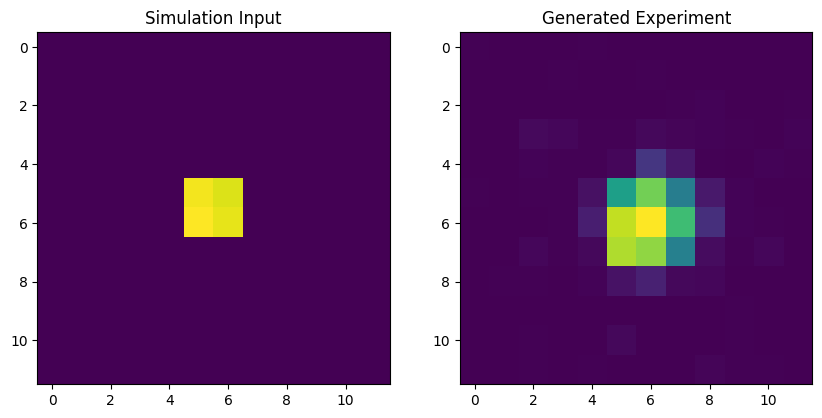

Epoch [92/301], Generator Loss: 0.6098151206970215, Discriminator Loss: 0.21434783935546875
Epoch [93/301], Generator Loss: 0.552114725112915, Discriminator Loss: 0.2652387022972107
Epoch [94/301], Generator Loss: 0.6211895942687988, Discriminator Loss: 0.25689417123794556
Epoch [95/301], Generator Loss: 0.475555419921875, Discriminator Loss: 0.2659175395965576
Epoch [96/301], Generator Loss: 0.6747713685035706, Discriminator Loss: 0.22844630479812622
Epoch [97/301], Generator Loss: 0.5379692316055298, Discriminator Loss: 0.2500930726528168
Epoch [98/301], Generator Loss: 0.5062977075576782, Discriminator Loss: 0.22168651223182678
Epoch [99/301], Generator Loss: 0.6797055006027222, Discriminator Loss: 0.228083536028862
Epoch [100/301], Generator Loss: 0.6174429059028625, Discriminator Loss: 0.24901191890239716
Epoch [101/301], Generator Loss: 0.5780145525932312, Discriminator Loss: 0.24746185541152954
Weights saved for epoch 100


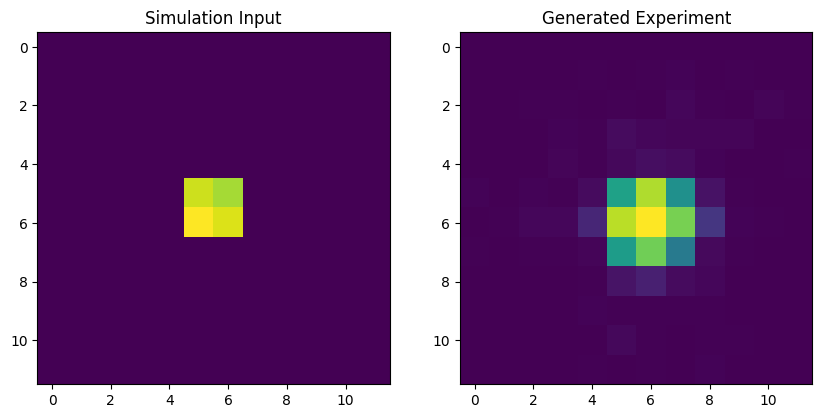

Epoch [102/301], Generator Loss: 0.5807273387908936, Discriminator Loss: 0.22944128513336182
Epoch [103/301], Generator Loss: 0.6321485638618469, Discriminator Loss: 0.22716356813907623
Epoch [104/301], Generator Loss: 0.6014403700828552, Discriminator Loss: 0.2429271787405014
Epoch [105/301], Generator Loss: 0.6206218600273132, Discriminator Loss: 0.23729774355888367
Epoch [106/301], Generator Loss: 0.5910649299621582, Discriminator Loss: 0.2366245985031128
Epoch [107/301], Generator Loss: 0.5748788118362427, Discriminator Loss: 0.24142242968082428
Epoch [108/301], Generator Loss: 0.6146402359008789, Discriminator Loss: 0.23150788247585297
Epoch [109/301], Generator Loss: 0.6053875684738159, Discriminator Loss: 0.25893867015838623
Epoch [110/301], Generator Loss: 0.5997054576873779, Discriminator Loss: 0.2231549471616745
Epoch [111/301], Generator Loss: 0.689706027507782, Discriminator Loss: 0.20647872984409332
Weights saved for epoch 110


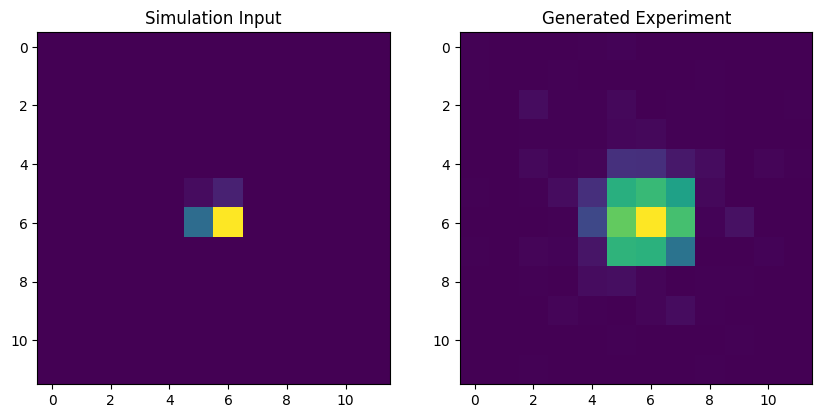

Epoch [112/301], Generator Loss: 0.7937539219856262, Discriminator Loss: 0.2508103549480438
Epoch [113/301], Generator Loss: 0.6605437994003296, Discriminator Loss: 0.23767223954200745
Epoch [114/301], Generator Loss: 0.7221744060516357, Discriminator Loss: 0.2204994261264801
Epoch [115/301], Generator Loss: 0.6440725922584534, Discriminator Loss: 0.25880664587020874
Epoch [116/301], Generator Loss: 0.8212226629257202, Discriminator Loss: 0.20636263489723206
Epoch [117/301], Generator Loss: 0.610206127166748, Discriminator Loss: 0.2426752746105194
Epoch [118/301], Generator Loss: 0.618627667427063, Discriminator Loss: 0.2134859561920166
Epoch [119/301], Generator Loss: 0.7653021216392517, Discriminator Loss: 0.2318510115146637
Epoch [120/301], Generator Loss: 0.6967414617538452, Discriminator Loss: 0.21599020063877106
Epoch [121/301], Generator Loss: 0.7088669538497925, Discriminator Loss: 0.21420995891094208
Weights saved for epoch 120


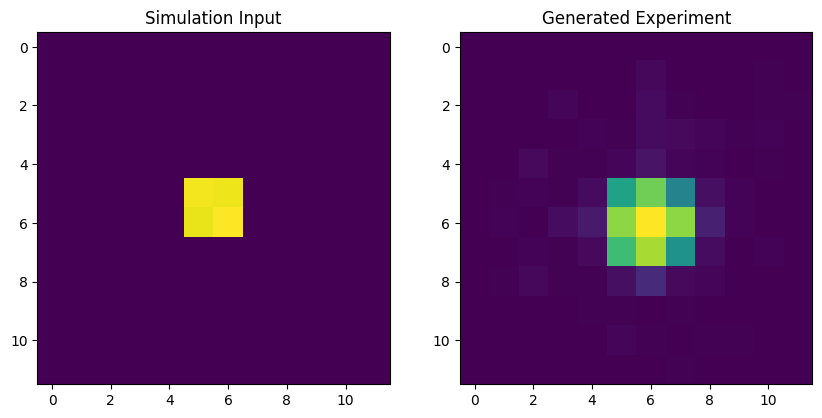

Epoch [122/301], Generator Loss: 0.7628740668296814, Discriminator Loss: 0.2568473815917969
Epoch [123/301], Generator Loss: 0.5794141888618469, Discriminator Loss: 0.2554146945476532
Epoch [124/301], Generator Loss: 0.7541587352752686, Discriminator Loss: 0.24012506008148193
Epoch [125/301], Generator Loss: 0.5380557179450989, Discriminator Loss: 0.22295892238616943
Epoch [126/301], Generator Loss: 0.48911789059638977, Discriminator Loss: 0.2496711015701294
Epoch [127/301], Generator Loss: 0.580754816532135, Discriminator Loss: 0.2444365918636322
Epoch [128/301], Generator Loss: 0.6190727353096008, Discriminator Loss: 0.22988153994083405
Epoch [129/301], Generator Loss: 0.8019311428070068, Discriminator Loss: 0.21629559993743896
Epoch [130/301], Generator Loss: 0.6035122275352478, Discriminator Loss: 0.22411015629768372
Epoch [131/301], Generator Loss: 0.7152290940284729, Discriminator Loss: 0.27174222469329834
Weights saved for epoch 130


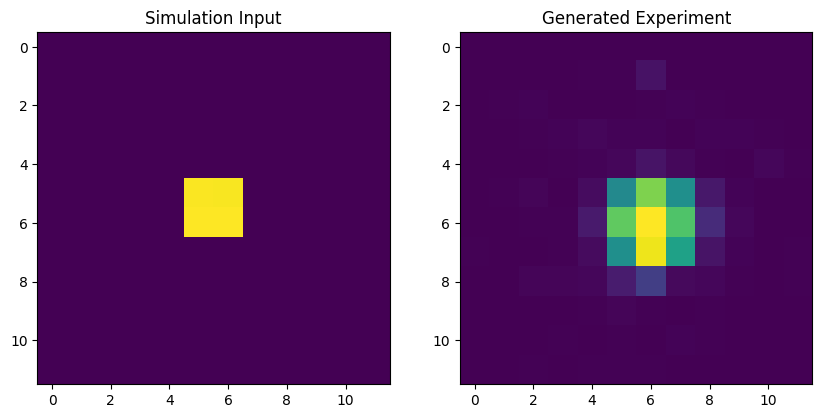

Epoch [132/301], Generator Loss: 0.6060073375701904, Discriminator Loss: 0.24477148056030273
Epoch [133/301], Generator Loss: 0.6421480774879456, Discriminator Loss: 0.23564055562019348
Epoch [134/301], Generator Loss: 0.5578126311302185, Discriminator Loss: 0.22338998317718506
Epoch [135/301], Generator Loss: 0.7244933843612671, Discriminator Loss: 0.20791003108024597
Epoch [136/301], Generator Loss: 0.7886602878570557, Discriminator Loss: 0.2333424836397171
Epoch [137/301], Generator Loss: 0.6933565139770508, Discriminator Loss: 0.23687663674354553
Epoch [138/301], Generator Loss: 0.6028807163238525, Discriminator Loss: 0.2338164746761322
Epoch [139/301], Generator Loss: 0.5496928095817566, Discriminator Loss: 0.25386926531791687
Epoch [140/301], Generator Loss: 0.6178285479545593, Discriminator Loss: 0.23952500522136688
Epoch [141/301], Generator Loss: 0.6468205451965332, Discriminator Loss: 0.21325832605361938
Weights saved for epoch 140


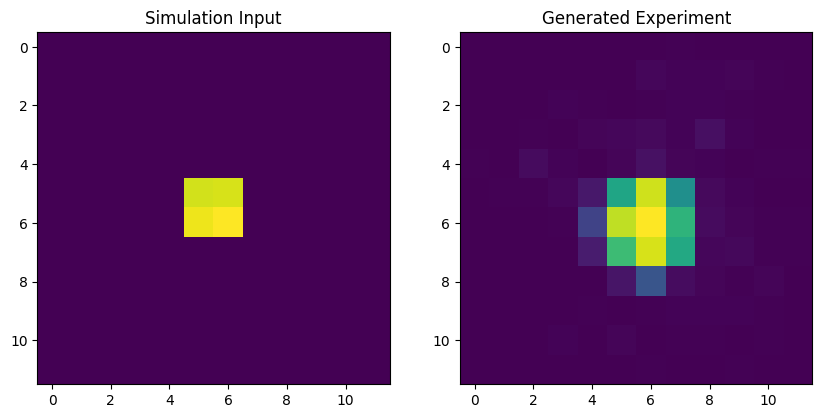

Epoch [142/301], Generator Loss: 0.607072651386261, Discriminator Loss: 0.25643932819366455
Epoch [143/301], Generator Loss: 0.4632526934146881, Discriminator Loss: 0.2501099109649658
Epoch [144/301], Generator Loss: 0.6544492244720459, Discriminator Loss: 0.24299314618110657
Epoch [145/301], Generator Loss: 0.5391848683357239, Discriminator Loss: 0.23881816864013672
Epoch [146/301], Generator Loss: 0.5365931987762451, Discriminator Loss: 0.2387106716632843
Epoch [147/301], Generator Loss: 0.544823408126831, Discriminator Loss: 0.26445314288139343
Epoch [148/301], Generator Loss: 0.4389559030532837, Discriminator Loss: 0.2620951235294342
Epoch [149/301], Generator Loss: 0.5213319659233093, Discriminator Loss: 0.23397846519947052
Epoch [150/301], Generator Loss: 0.9035939574241638, Discriminator Loss: 0.23743805289268494
Epoch [151/301], Generator Loss: 0.7634990215301514, Discriminator Loss: 0.23988012969493866
Weights saved for epoch 150


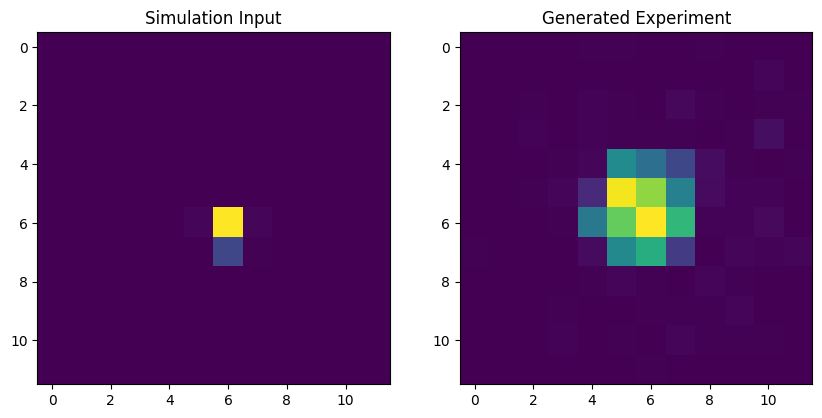

Epoch [152/301], Generator Loss: 0.7335209250450134, Discriminator Loss: 0.24353444576263428
Epoch [153/301], Generator Loss: 0.6763731837272644, Discriminator Loss: 0.22877031564712524
Epoch [154/301], Generator Loss: 0.49791958928108215, Discriminator Loss: 0.2543165981769562
Epoch [155/301], Generator Loss: 0.6335914731025696, Discriminator Loss: 0.24715685844421387
Epoch [156/301], Generator Loss: 0.7301570177078247, Discriminator Loss: 0.24760198593139648
Epoch [157/301], Generator Loss: 0.5357875227928162, Discriminator Loss: 0.24725627899169922
Epoch [158/301], Generator Loss: 0.5590308308601379, Discriminator Loss: 0.2496391236782074
Epoch [159/301], Generator Loss: 0.6476799249649048, Discriminator Loss: 0.23125949501991272
Epoch [160/301], Generator Loss: 0.6178203225135803, Discriminator Loss: 0.24507728219032288
Epoch [161/301], Generator Loss: 0.5174670219421387, Discriminator Loss: 0.2524755001068115
Weights saved for epoch 160


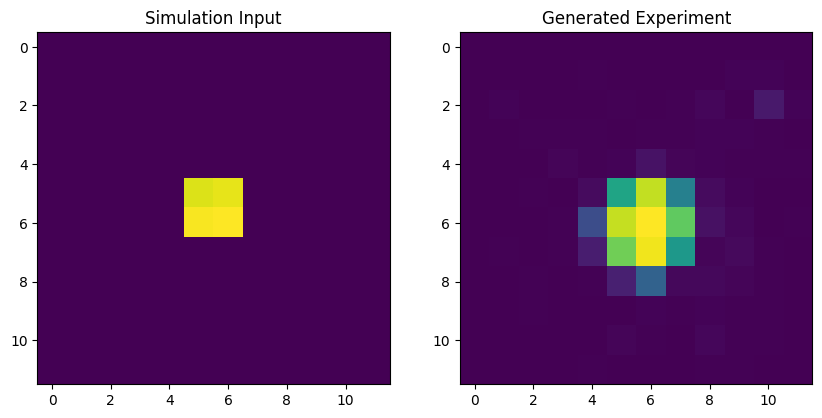

Epoch [162/301], Generator Loss: 0.5984922051429749, Discriminator Loss: 0.248239666223526
Epoch [163/301], Generator Loss: 0.5362867116928101, Discriminator Loss: 0.24805021286010742
Epoch [164/301], Generator Loss: 0.5212417244911194, Discriminator Loss: 0.2384258210659027
Epoch [165/301], Generator Loss: 0.4687579572200775, Discriminator Loss: 0.2480842024087906
Epoch [166/301], Generator Loss: 0.6394674777984619, Discriminator Loss: 0.23412229120731354
Epoch [167/301], Generator Loss: 0.6104991436004639, Discriminator Loss: 0.24880000948905945
Epoch [168/301], Generator Loss: 0.4892958998680115, Discriminator Loss: 0.2452082335948944
Epoch [169/301], Generator Loss: 0.561097264289856, Discriminator Loss: 0.23796232044696808
Epoch [170/301], Generator Loss: 0.687110185623169, Discriminator Loss: 0.22695094347000122
Epoch [171/301], Generator Loss: 0.4581882953643799, Discriminator Loss: 0.2724871039390564
Weights saved for epoch 170


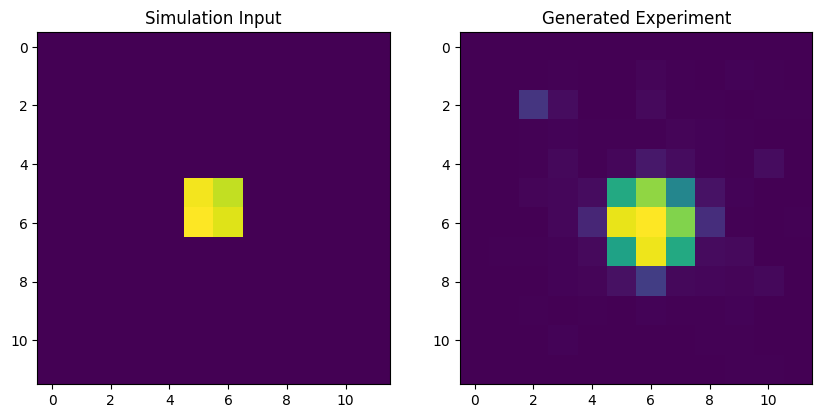

Epoch [172/301], Generator Loss: 0.5363883376121521, Discriminator Loss: 0.2540295720100403
Epoch [173/301], Generator Loss: 0.5019068121910095, Discriminator Loss: 0.26767104864120483
Epoch [174/301], Generator Loss: 0.47347038984298706, Discriminator Loss: 0.2525016665458679
Epoch [175/301], Generator Loss: 0.6532065272331238, Discriminator Loss: 0.2581019401550293
Epoch [176/301], Generator Loss: 0.5124795436859131, Discriminator Loss: 0.2549465000629425
Epoch [177/301], Generator Loss: 0.5094046592712402, Discriminator Loss: 0.2531302571296692
Epoch [178/301], Generator Loss: 0.550183892250061, Discriminator Loss: 0.23288065195083618
Epoch [179/301], Generator Loss: 0.6112275719642639, Discriminator Loss: 0.22950923442840576
Epoch [180/301], Generator Loss: 0.6213858127593994, Discriminator Loss: 0.23682135343551636
Epoch [181/301], Generator Loss: 0.6132925748825073, Discriminator Loss: 0.24237416684627533
Weights saved for epoch 180


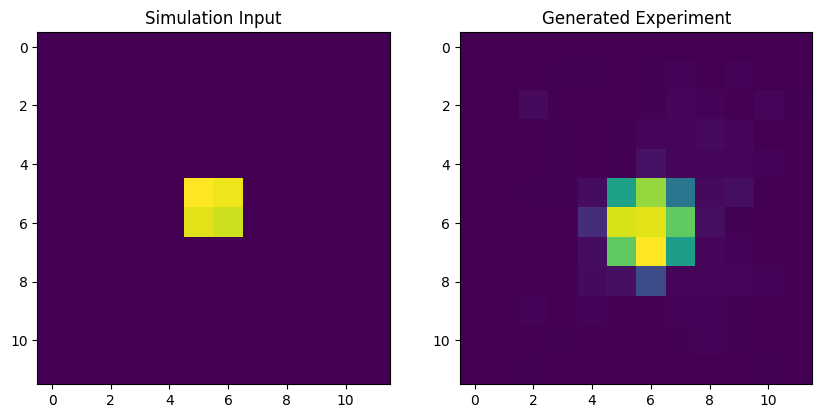

Epoch [182/301], Generator Loss: 0.6721562743186951, Discriminator Loss: 0.24033185839653015
Epoch [183/301], Generator Loss: 0.5698441863059998, Discriminator Loss: 0.24193310737609863
Epoch [184/301], Generator Loss: 0.6269738674163818, Discriminator Loss: 0.23909693956375122
Epoch [185/301], Generator Loss: 0.5691647529602051, Discriminator Loss: 0.23883910477161407
Epoch [186/301], Generator Loss: 0.5056747198104858, Discriminator Loss: 0.23892048001289368
Epoch [187/301], Generator Loss: 0.5893847942352295, Discriminator Loss: 0.22698372602462769
Epoch [188/301], Generator Loss: 0.5468500256538391, Discriminator Loss: 0.24617859721183777
Epoch [189/301], Generator Loss: 0.5790957808494568, Discriminator Loss: 0.23994775116443634
Epoch [190/301], Generator Loss: 0.5628337860107422, Discriminator Loss: 0.2340603768825531
Epoch [191/301], Generator Loss: 0.5972282290458679, Discriminator Loss: 0.27155715227127075
Weights saved for epoch 190


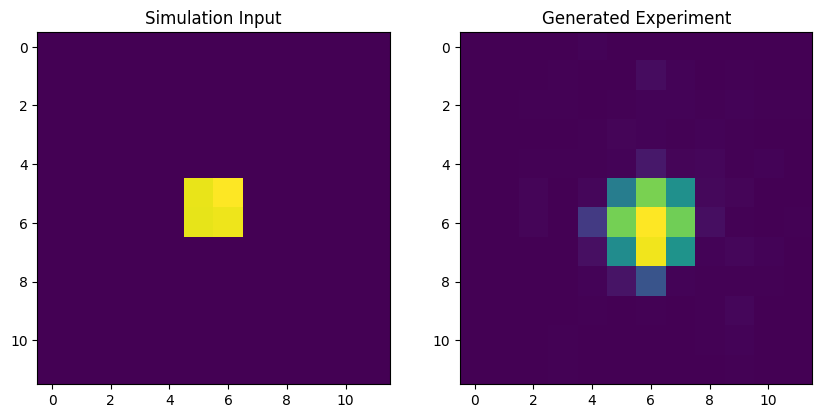

Epoch [192/301], Generator Loss: 0.5776864886283875, Discriminator Loss: 0.24814951419830322
Epoch [193/301], Generator Loss: 0.6707005500793457, Discriminator Loss: 0.2557730972766876
Epoch [194/301], Generator Loss: 0.6255211234092712, Discriminator Loss: 0.2514851689338684
Epoch [195/301], Generator Loss: 0.546511173248291, Discriminator Loss: 0.25209641456604004
Epoch [196/301], Generator Loss: 0.5620244741439819, Discriminator Loss: 0.24878759682178497
Epoch [197/301], Generator Loss: 0.597062349319458, Discriminator Loss: 0.25174587965011597
Epoch [198/301], Generator Loss: 0.49807512760162354, Discriminator Loss: 0.26021838188171387
Epoch [199/301], Generator Loss: 0.5275252461433411, Discriminator Loss: 0.2619487941265106
Epoch [200/301], Generator Loss: 0.5328706502914429, Discriminator Loss: 0.23790684342384338
Epoch [201/301], Generator Loss: 0.5130729675292969, Discriminator Loss: 0.24630676209926605
Weights saved for epoch 200


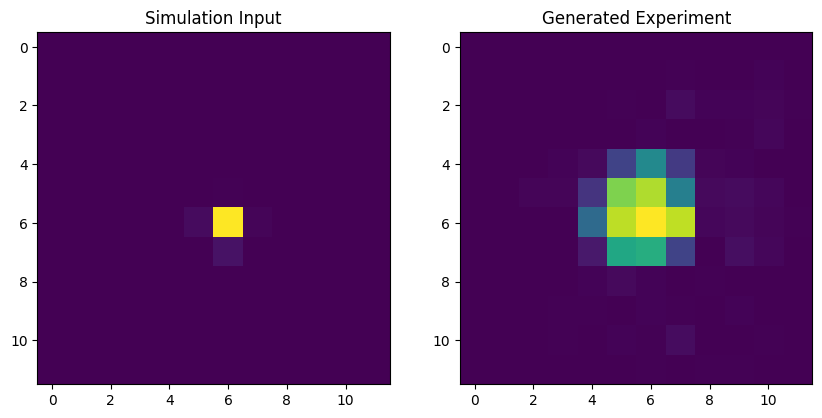

Epoch [202/301], Generator Loss: 0.6227421760559082, Discriminator Loss: 0.23702755570411682
Epoch [203/301], Generator Loss: 0.5552037954330444, Discriminator Loss: 0.2593660354614258
Epoch [204/301], Generator Loss: 0.5820420384407043, Discriminator Loss: 0.25211548805236816
Epoch [205/301], Generator Loss: 0.6372373700141907, Discriminator Loss: 0.234959214925766
Epoch [206/301], Generator Loss: 0.45581692457199097, Discriminator Loss: 0.2549120783805847
Epoch [207/301], Generator Loss: 0.5700812339782715, Discriminator Loss: 0.23646065592765808
Epoch [208/301], Generator Loss: 0.5561008453369141, Discriminator Loss: 0.24450868368148804
Epoch [209/301], Generator Loss: 0.5826789140701294, Discriminator Loss: 0.23886790871620178
Epoch [210/301], Generator Loss: 0.5192096829414368, Discriminator Loss: 0.2405610978603363
Epoch [211/301], Generator Loss: 0.5704576373100281, Discriminator Loss: 0.2516031265258789
Weights saved for epoch 210


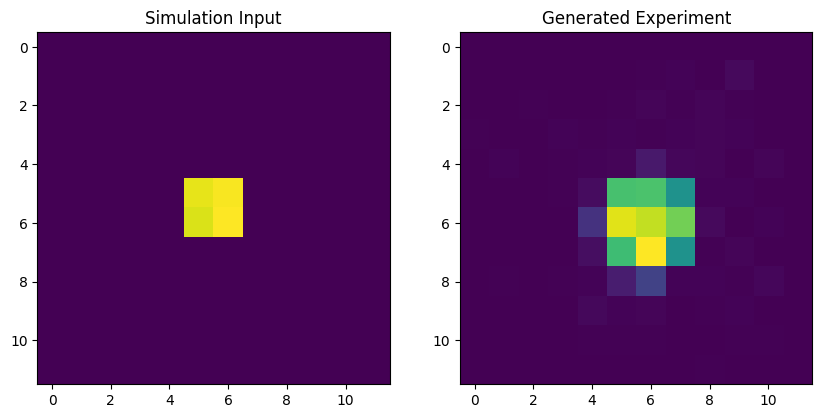

Epoch [212/301], Generator Loss: 0.5322524309158325, Discriminator Loss: 0.25130128860473633
Epoch [213/301], Generator Loss: 0.6409211754798889, Discriminator Loss: 0.24277576804161072
Epoch [214/301], Generator Loss: 0.540981650352478, Discriminator Loss: 0.2539544999599457
Epoch [215/301], Generator Loss: 0.6045334935188293, Discriminator Loss: 0.23341429233551025
Epoch [216/301], Generator Loss: 0.5864366292953491, Discriminator Loss: 0.27361226081848145
Epoch [217/301], Generator Loss: 0.5413494110107422, Discriminator Loss: 0.27548497915267944
Epoch [218/301], Generator Loss: 0.5096630454063416, Discriminator Loss: 0.25489047169685364
Epoch [219/301], Generator Loss: 0.5314003229141235, Discriminator Loss: 0.2662884593009949
Epoch [220/301], Generator Loss: 0.566665530204773, Discriminator Loss: 0.25339174270629883
Epoch [221/301], Generator Loss: 0.5654924511909485, Discriminator Loss: 0.24453306198120117
Weights saved for epoch 220


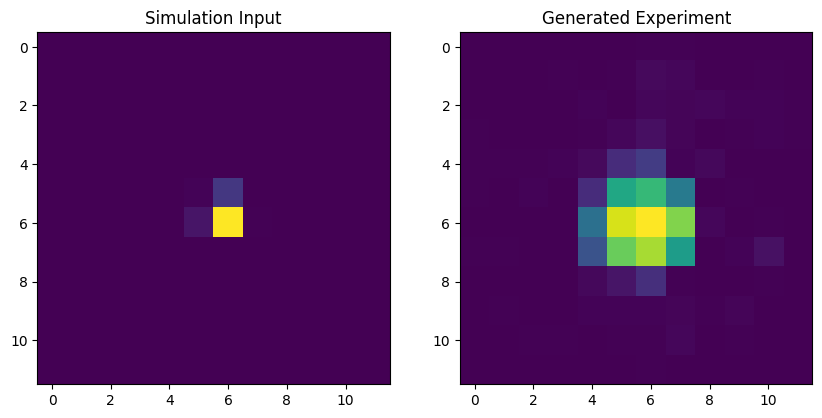

Epoch [222/301], Generator Loss: 0.6031442880630493, Discriminator Loss: 0.2454855740070343
Epoch [223/301], Generator Loss: 0.5876258611679077, Discriminator Loss: 0.24483820796012878
Epoch [224/301], Generator Loss: 0.5673309564590454, Discriminator Loss: 0.25881797075271606
Epoch [225/301], Generator Loss: 0.5593238472938538, Discriminator Loss: 0.25866997241973877
Epoch [226/301], Generator Loss: 0.5855926275253296, Discriminator Loss: 0.27083584666252136
Epoch [227/301], Generator Loss: 0.5969709753990173, Discriminator Loss: 0.24906939268112183
Epoch [228/301], Generator Loss: 0.5290626883506775, Discriminator Loss: 0.24870708584785461
Epoch [229/301], Generator Loss: 0.5347631573677063, Discriminator Loss: 0.25433969497680664
Epoch [230/301], Generator Loss: 0.5783020257949829, Discriminator Loss: 0.26020509004592896
Epoch [231/301], Generator Loss: 0.5229402184486389, Discriminator Loss: 0.24037012457847595
Weights saved for epoch 230


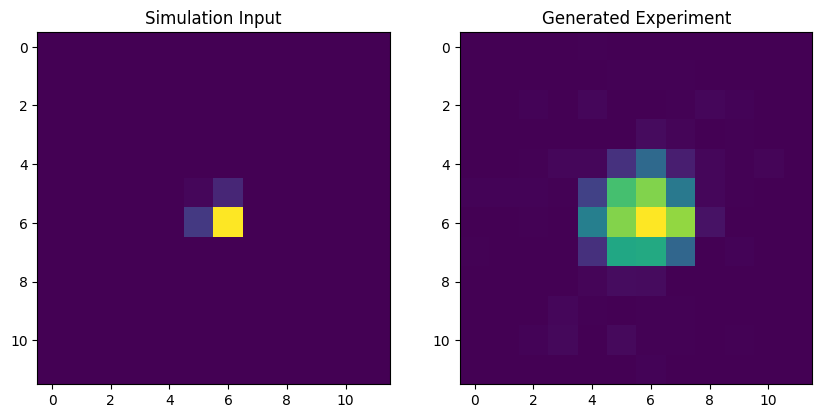

Epoch [232/301], Generator Loss: 0.5969905257225037, Discriminator Loss: 0.2535933256149292
Epoch [233/301], Generator Loss: 0.5921696424484253, Discriminator Loss: 0.26249393820762634
Epoch [234/301], Generator Loss: 0.5297864079475403, Discriminator Loss: 0.24734993278980255
Epoch [235/301], Generator Loss: 0.4981059730052948, Discriminator Loss: 0.25052759051322937
Epoch [236/301], Generator Loss: 0.5807809233665466, Discriminator Loss: 0.23747843503952026
Epoch [237/301], Generator Loss: 0.5216054320335388, Discriminator Loss: 0.2491869181394577
Epoch [238/301], Generator Loss: 0.5606592893600464, Discriminator Loss: 0.24029475450515747
Epoch [239/301], Generator Loss: 0.5894689559936523, Discriminator Loss: 0.24403472244739532
Epoch [240/301], Generator Loss: 0.528594434261322, Discriminator Loss: 0.2503896951675415
Epoch [241/301], Generator Loss: 0.48288461565971375, Discriminator Loss: 0.25366246700286865
Weights saved for epoch 240


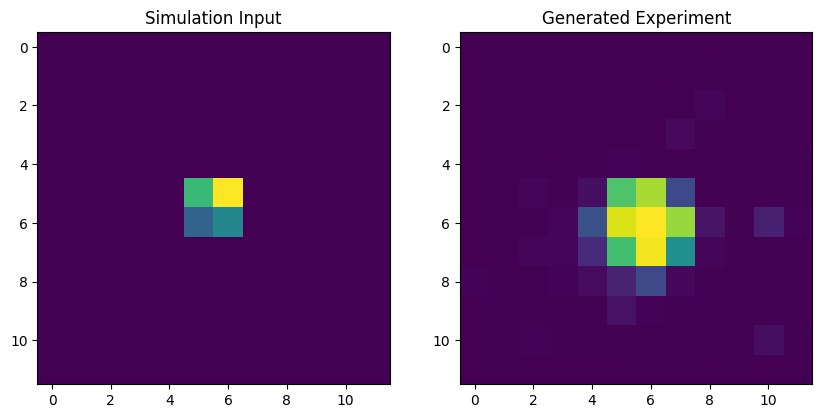

Epoch [242/301], Generator Loss: 0.49848246574401855, Discriminator Loss: 0.24690255522727966
Epoch [243/301], Generator Loss: 0.46027007699012756, Discriminator Loss: 0.2494654357433319
Epoch [244/301], Generator Loss: 0.5201514363288879, Discriminator Loss: 0.2483706921339035
Epoch [245/301], Generator Loss: 0.6240160465240479, Discriminator Loss: 0.24603457748889923
Epoch [246/301], Generator Loss: 0.5769219398498535, Discriminator Loss: 0.24328213930130005
Epoch [247/301], Generator Loss: 0.5260874629020691, Discriminator Loss: 0.23146267235279083
Epoch [248/301], Generator Loss: 0.5147303938865662, Discriminator Loss: 0.25858235359191895
Epoch [249/301], Generator Loss: 0.5660701394081116, Discriminator Loss: 0.2517501711845398
Epoch [250/301], Generator Loss: 0.5667737126350403, Discriminator Loss: 0.2396569550037384
Epoch [251/301], Generator Loss: 0.46907341480255127, Discriminator Loss: 0.25251346826553345
Weights saved for epoch 250


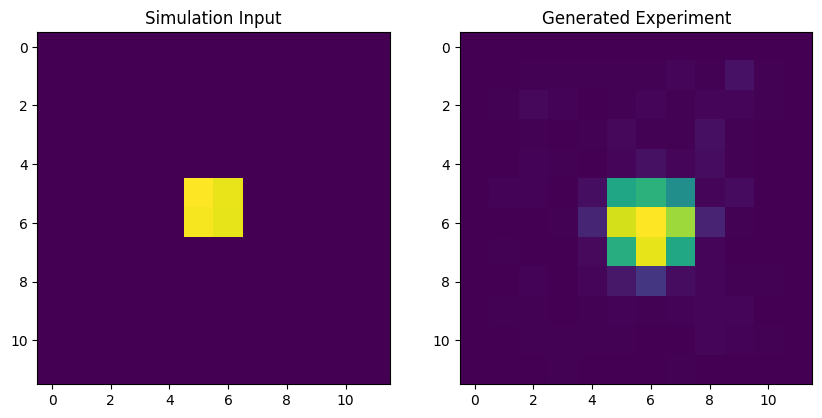

Epoch [252/301], Generator Loss: 0.5824913382530212, Discriminator Loss: 0.23965951800346375
Epoch [253/301], Generator Loss: 0.6410024166107178, Discriminator Loss: 0.2462901473045349
Epoch [254/301], Generator Loss: 0.6014721989631653, Discriminator Loss: 0.2244379222393036
Epoch [255/301], Generator Loss: 0.5119262933731079, Discriminator Loss: 0.24395737051963806
Epoch [256/301], Generator Loss: 0.5759883522987366, Discriminator Loss: 0.25774720311164856
Epoch [257/301], Generator Loss: 0.5481995344161987, Discriminator Loss: 0.24600178003311157
Epoch [258/301], Generator Loss: 0.5932056903839111, Discriminator Loss: 0.23939943313598633
Epoch [259/301], Generator Loss: 0.5023320913314819, Discriminator Loss: 0.25078126788139343
Epoch [260/301], Generator Loss: 0.5553560853004456, Discriminator Loss: 0.24580654501914978
Epoch [261/301], Generator Loss: 0.5401091575622559, Discriminator Loss: 0.2513022720813751
Weights saved for epoch 260


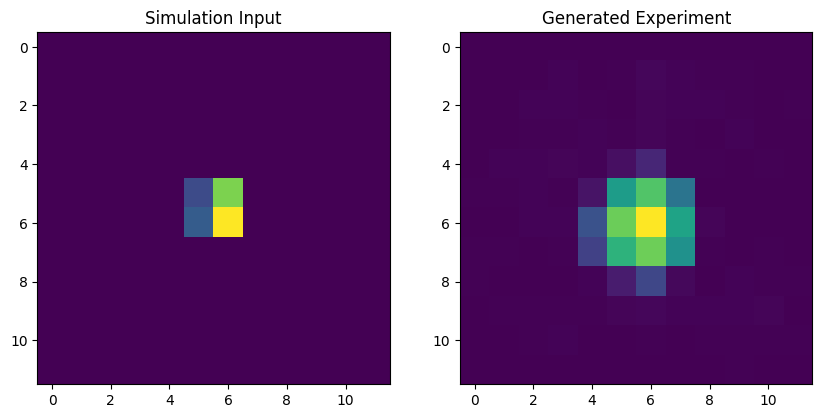

Epoch [262/301], Generator Loss: 0.5528855919837952, Discriminator Loss: 0.25375357270240784
Epoch [263/301], Generator Loss: 0.5373155474662781, Discriminator Loss: 0.2433462291955948
Epoch [264/301], Generator Loss: 0.44836971163749695, Discriminator Loss: 0.2517630457878113
Epoch [265/301], Generator Loss: 0.5486654043197632, Discriminator Loss: 0.24752618372440338
Epoch [266/301], Generator Loss: 0.5057511329650879, Discriminator Loss: 0.23951786756515503
Epoch [267/301], Generator Loss: 0.5158718228340149, Discriminator Loss: 0.24699538946151733
Epoch [268/301], Generator Loss: 0.5424479246139526, Discriminator Loss: 0.25147193670272827
Epoch [269/301], Generator Loss: 0.5416111946105957, Discriminator Loss: 0.2476462721824646
Epoch [270/301], Generator Loss: 0.5044929385185242, Discriminator Loss: 0.2535461187362671
Epoch [271/301], Generator Loss: 0.5854479074478149, Discriminator Loss: 0.2570527195930481
Weights saved for epoch 270


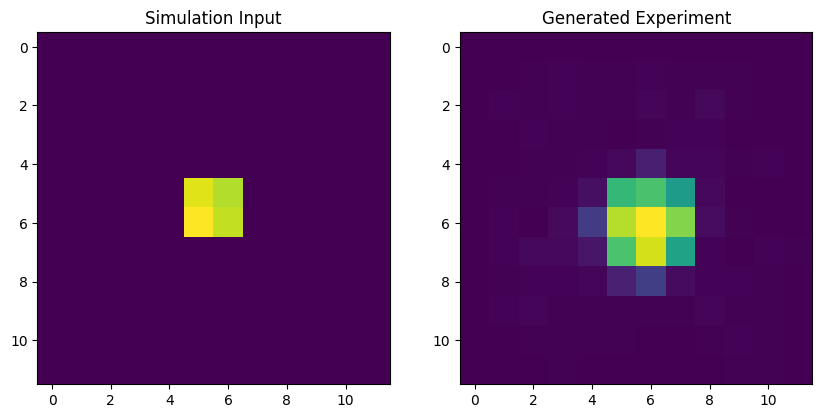

Epoch [272/301], Generator Loss: 0.5659690499305725, Discriminator Loss: 0.25834396481513977
Epoch [273/301], Generator Loss: 0.48406532406806946, Discriminator Loss: 0.25835365056991577
Epoch [274/301], Generator Loss: 0.5940439701080322, Discriminator Loss: 0.2475830465555191
Epoch [275/301], Generator Loss: 0.492847204208374, Discriminator Loss: 0.2548244893550873
Epoch [276/301], Generator Loss: 0.5393773913383484, Discriminator Loss: 0.24616128206253052
Epoch [277/301], Generator Loss: 0.47411471605300903, Discriminator Loss: 0.249362051486969
Epoch [278/301], Generator Loss: 0.5044447183609009, Discriminator Loss: 0.25104206800460815
Epoch [279/301], Generator Loss: 0.5812712907791138, Discriminator Loss: 0.24929381906986237
Epoch [280/301], Generator Loss: 0.5328322052955627, Discriminator Loss: 0.26053717732429504
Epoch [281/301], Generator Loss: 0.5422460436820984, Discriminator Loss: 0.2530624568462372
Weights saved for epoch 280


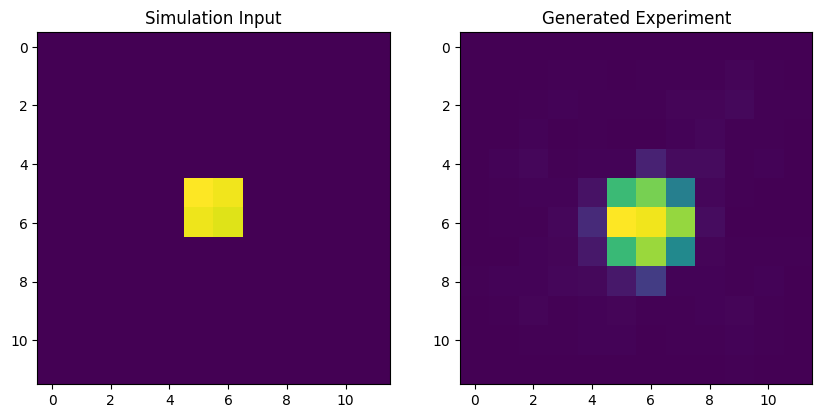

Epoch [282/301], Generator Loss: 0.5874312520027161, Discriminator Loss: 0.25793975591659546
Epoch [283/301], Generator Loss: 0.6163116097450256, Discriminator Loss: 0.25203078985214233
Epoch [284/301], Generator Loss: 0.522405207157135, Discriminator Loss: 0.24878981709480286
Epoch [285/301], Generator Loss: 0.5338249206542969, Discriminator Loss: 0.24088163673877716
Epoch [286/301], Generator Loss: 0.541313886642456, Discriminator Loss: 0.2513265013694763
Epoch [287/301], Generator Loss: 0.5363291501998901, Discriminator Loss: 0.25121283531188965
Epoch [288/301], Generator Loss: 0.5180628895759583, Discriminator Loss: 0.2466125339269638
Epoch [289/301], Generator Loss: 0.5034260153770447, Discriminator Loss: 0.25678908824920654
Epoch [290/301], Generator Loss: 0.53225177526474, Discriminator Loss: 0.2467099130153656
Epoch [291/301], Generator Loss: 0.5035292506217957, Discriminator Loss: 0.2638195753097534
Weights saved for epoch 290


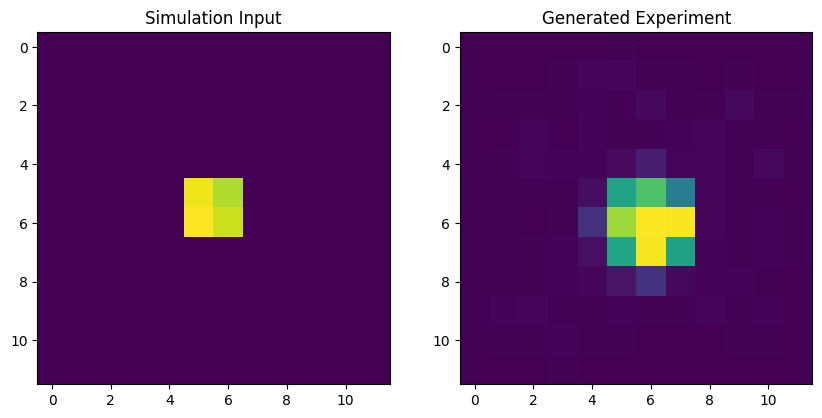

Epoch [292/301], Generator Loss: 0.5276113748550415, Discriminator Loss: 0.24715177714824677
Epoch [293/301], Generator Loss: 0.5419549345970154, Discriminator Loss: 0.24410264194011688
Epoch [294/301], Generator Loss: 0.5527215600013733, Discriminator Loss: 0.25106900930404663
Epoch [295/301], Generator Loss: 0.5808011293411255, Discriminator Loss: 0.25440120697021484
Epoch [296/301], Generator Loss: 0.5448694825172424, Discriminator Loss: 0.25164029002189636
Epoch [297/301], Generator Loss: 0.5246861577033997, Discriminator Loss: 0.25115883350372314
Epoch [298/301], Generator Loss: 0.5810292363166809, Discriminator Loss: 0.2560849189758301
Epoch [299/301], Generator Loss: 0.5651205778121948, Discriminator Loss: 0.24180221557617188
Epoch [300/301], Generator Loss: 0.548212468624115, Discriminator Loss: 0.24936765432357788
Epoch [301/301], Generator Loss: 0.5112007856369019, Discriminator Loss: 0.24820247292518616
Weights saved for epoch 300


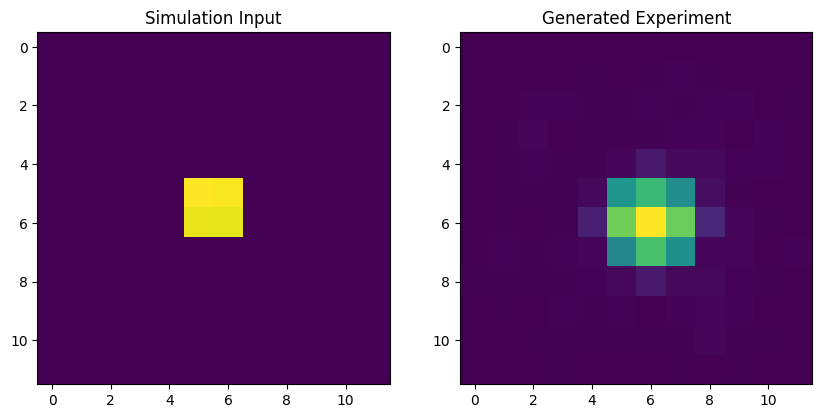

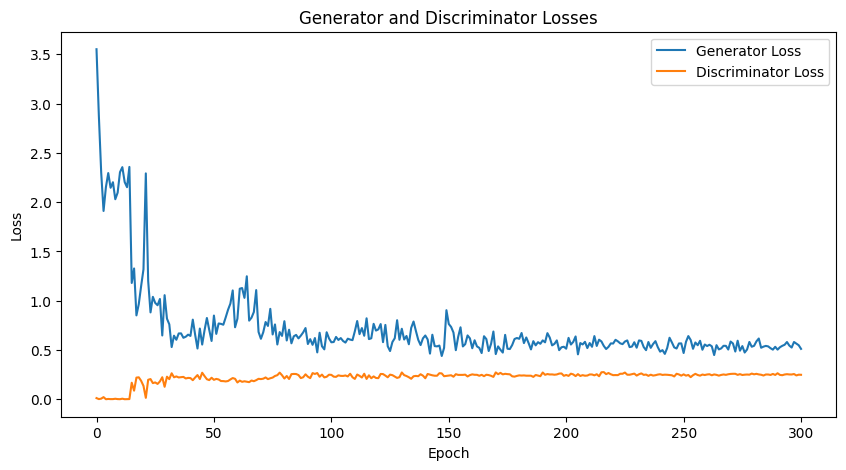

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            # Optional dropout here if desired
            #nn.Dropout(0.2),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            #nn.Dropout(0.2)  # Dropout in encoder
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            #nn.Dropout(0.2),  # Dropout in decoder

            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 1, kernel_size=4, stride=1, padding=1)
        )

    def forward(self, x):
        return self.model(x)

def cycle_loss(real, reconstructed):
    if real.size() != reconstructed.size():
        reconstructed = F.interpolate(reconstructed, size=real.size()[2:], mode='bilinear', align_corners=False)
    return torch.mean(torch.abs(real - reconstructed))

# Initialize models
gen = Generator().cuda()
disc = Discriminator().cuda()

# Optimizers
gen_optimizer = optim.Adam(gen.parameters(), lr=0.0001, betas=(0.5, 0.999))
disc_optimizer = optim.Adam(disc.parameters(), lr=0.0001, betas=(0.5, 0.999))

checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

gen_losses = []
disc_losses = []

epochs = 301
for epoch in range(epochs):
    for sim_images, exp_images in zip(sim_train_loader, exp_train_loader):
        sim_images, exp_images = sim_images.cuda(), exp_images.cuda()

        # Generate images
        fake_exp = gen(sim_images)
        fake_sim = gen(exp_images)

        # Train Discriminator
        disc_optimizer.zero_grad()
        real_loss_exp = torch.mean((disc(exp_images) - 1) ** 2)
        fake_loss_exp = torch.mean(disc(fake_exp) ** 2)
        disc_loss_exp = (real_loss_exp + fake_loss_exp) / 2

        real_loss_sim = torch.mean((disc(sim_images) - 1) ** 2)
        fake_loss_sim = torch.mean(disc(fake_sim) ** 2)
        disc_loss_sim = (real_loss_sim + fake_loss_sim) / 2

        disc_loss = (disc_loss_exp + disc_loss_sim) / 2
        disc_loss.backward(retain_graph=True)
        disc_optimizer.step()

        # Train Generator
        gen_optimizer.zero_grad()
        gen_loss_exp = torch.mean((disc(fake_exp) - 1) ** 2)
        gen_loss_sim = torch.mean((disc(fake_sim) - 1) ** 2)

        cycle_loss_exp = cycle_loss(exp_images, gen(fake_sim))
        cycle_loss_sim = cycle_loss(sim_images, gen(fake_exp))

        gen_loss = gen_loss_exp + gen_loss_sim + 5 * (cycle_loss_exp + cycle_loss_sim)
        gen_loss.backward()
        gen_optimizer.step()

    gen_losses.append(gen_loss.item())
    disc_losses.append(disc_loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Generator Loss: {gen_loss.item()}, Discriminator Loss: {disc_loss.item()}")

    # Save weights every 10 epochs
    if epoch % 10 == 0:
        torch.save(gen.state_dict(), f"{checkpoint_dir}/generator_epoch_{epoch}.pth")
        torch.save(disc.state_dict(), f"{checkpoint_dir}/discriminator_epoch_{epoch}.pth")
        print(f"Weights saved for epoch {epoch}")

        # Visualization of results
        with torch.no_grad():
            example_sim = sim_images[0:1]
            example_generated = gen(example_sim)[0]
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Simulation Input")
            plt.imshow(example_sim[0].cpu().numpy().squeeze(), cmap="viridis")
            plt.subplot(1, 2, 2)
            plt.title("Generated Experiment")
            plt.imshow(example_generated.cpu().numpy().squeeze(), cmap="viridis")
            plt.show()

# Plot Losses
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Discriminator Losses')
plt.show()


# Ukládání vah

In [23]:
from google.colab import drive
drive.mount('/content/drive')

import os
checkpoint_dir = '/content/drive/MyDrive/checkpoints301epoch'
os.makedirs(checkpoint_dir, exist_ok=True)


import shutil

shutil.copytree('/content/checkpoints', checkpoint_dir, dirs_exist_ok=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/checkpoints301epoch'

In [ ]:

gen = Generator().cuda()
disc = Discriminator().cuda()


gen.load_state_dict(torch.load('/content/drive/MyDrive/checkpoints/generator_epoch_100.pth'))
disc.load_state_dict(torch.load('/content/drive/MyDrive/checkpoints/discriminator_epoch_100.pth'))

gen.eval()


In [24]:
import os
from google.colab import drive
drive.mount('/content/drive')

output_folder = '/content/drive/MyDrive/generated_images301epoch'
os.makedirs(output_folder, exist_ok=True)

gen.eval()
for i, sim_image_batch in enumerate(sim_val_loader):
    sim_image_batch = sim_image_batch.cuda()

    with torch.no_grad():
        generated_batch = gen(sim_image_batch)


    for j in range(generated_batch.size(0)):
        sim_image = sim_image_batch[j].cpu().numpy().squeeze() * 0.5 + 0.5
        generated_image = generated_batch[j].cpu().numpy().squeeze() * 0.5 + 0.5


        sim_path = os.path.join(output_folder, f"sim_image_{i * sim_test_loader.batch_size + j}.png")
        plt.imsave(sim_path, sim_image, cmap="viridis")


        gen_path = os.path.join(output_folder, f"gen_image_{i * sim_test_loader.batch_size + j}.png")
        plt.imsave(gen_path, generated_image, cmap="viridis")



print(f"Pictures are saved in this folder: {output_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Изображения сохранены в папке: /content/drive/MyDrive/generated_images301epoch


# Zobrazení vygenerovaných výsledků a porovnání s experimentálními daty

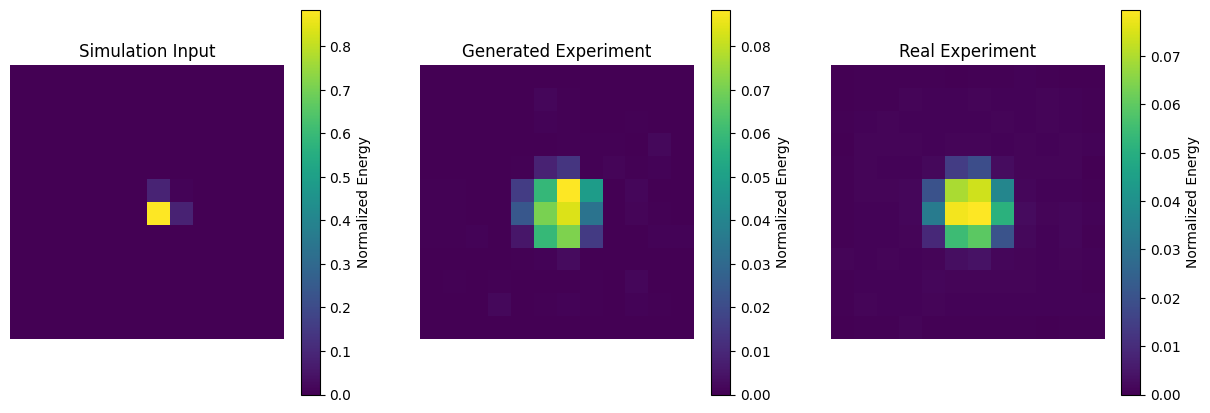

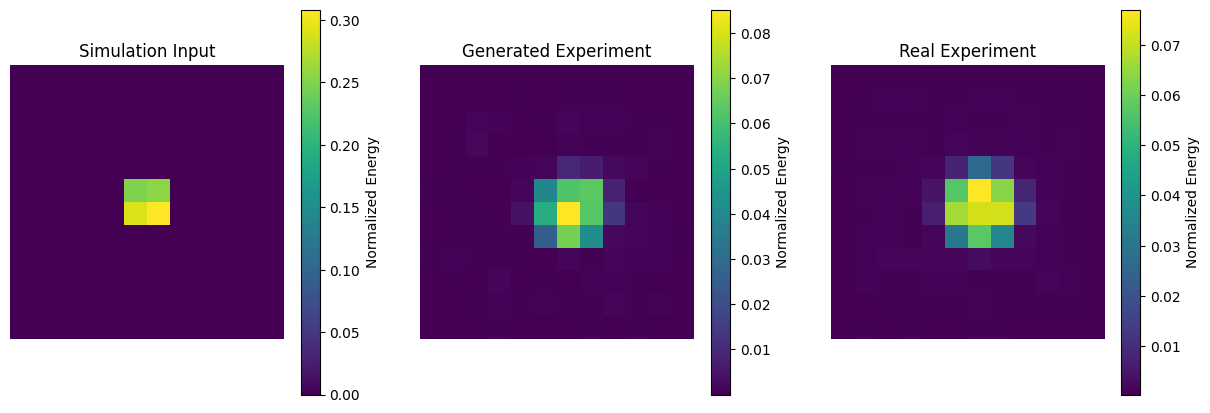

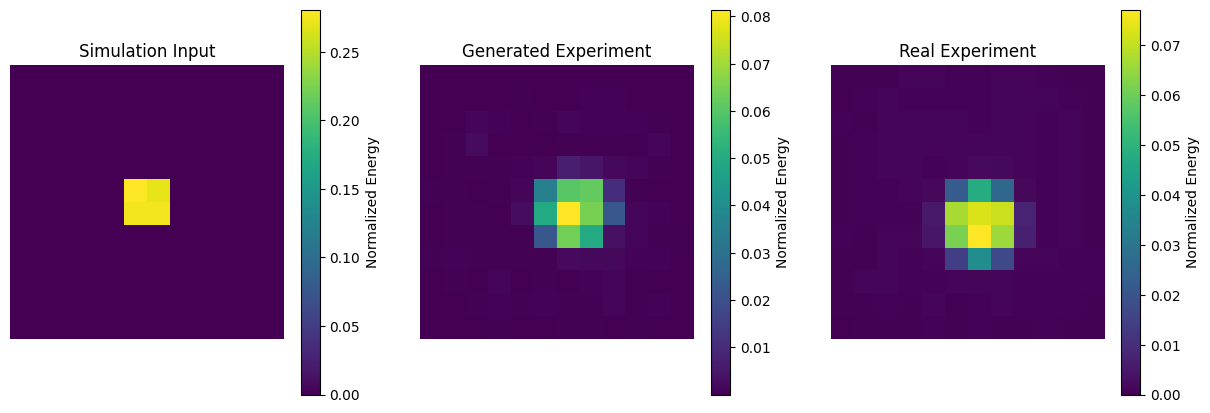

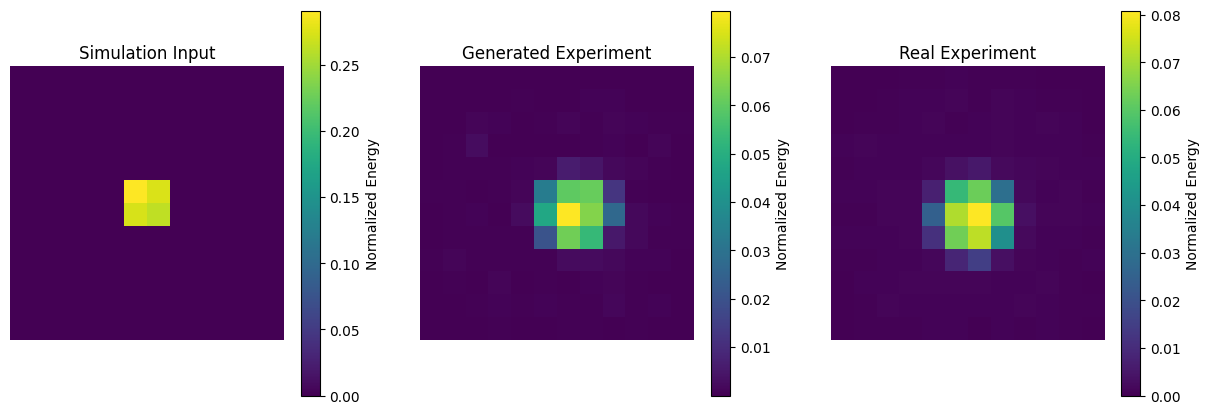

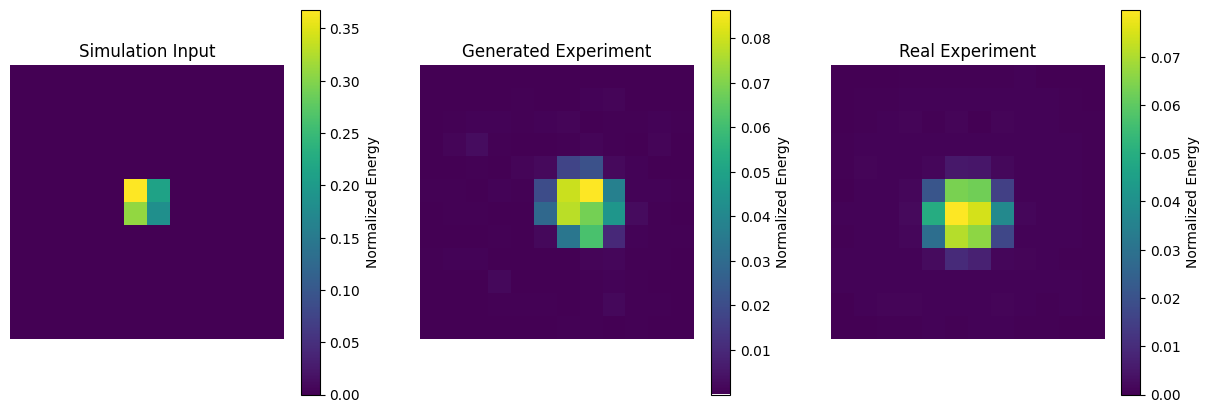

In [27]:
gen.eval()  # Evaluation mode

# Get a batch of experimental images to compare with (adjust as needed)
exp_image_batch = next(iter(exp_test_loader))
exp_image_batch = exp_image_batch.cuda()

for i, sim_image_batch in enumerate(sim_test_loader):
    sim_image_batch = sim_image_batch.cuda()

    with torch.no_grad():
        generated_batch = gen(sim_image_batch)

    # Visualize the first 5 images from the batch
    for j in range(min(5, generated_batch.size(0))):
        sim_image = sim_image_batch[j].cpu().numpy().squeeze() * 0.5 + 0.5
        generated_image = generated_batch[j].cpu().numpy().squeeze() * 0.5 + 0.5
        exp_image = exp_image_batch[j].cpu().numpy().squeeze() * 0.5 + 0.5

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.title("Simulation Input")
        plt.imshow(sim_image, cmap="viridis")
        plt.colorbar(label='Normalized Energy')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Generated Experiment")
        plt.imshow(generated_image, cmap="viridis")
        plt.colorbar(label='Normalized Energy')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Real Experiment")
        plt.imshow(exp_image, cmap="viridis")
        plt.colorbar(label='Normalized Energy')
        plt.axis('off')

        plt.show()

    # Break after one batch to check
    break


In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

def denormalize_energy(energy, E_min=1.7, E_max=4954.6):
    """
    Denormalizes the energy value from the [0, 1] range back to [E_min, E_max].
    """
    return energy * (E_max - E_min) + E_min

def image_to_cluster(image, E_min=1.7, E_max=4954.6, threshold=0.0001):
    """
    Converts a 2D image into a list of coordinates and energy values.
    """
    cluster_data = []
    # Get the first channel (assuming it represents intensity)
    intensity_image = image[:, :, 0]  # This line selects the first channel
    for x in range(intensity_image.shape[0]):
        for y in range(intensity_image.shape[1]):
            energy = intensity_image[x, y]  # Use intensity for thresholding
            if energy > threshold:  # Consider only non-zero pixels
                denormalized_energy = denormalize_energy(energy, E_min, E_max)
                cluster_data.append((x, y, denormalized_energy, 0))  # Add t = 0
    return cluster_data

def cluster_to_string(cluster_data):
    """
    Converts a cluster data list into a string of the format:
    [x, y, E, t][x, y, E, t]...
    """
    return ''.join(f'[{x}, {y}, {E:.1f}, {t}]' for x, y, E, t in cluster_data)

# Path to the folder with the images
generated_images_folder = "/content/drive/MyDrive/generated_images"
output_file = "/content/drive/MyDrive/generated_clusters.txt"

# Open the file for writing
with open(output_file, 'w') as f_out:
    # Process each image
    for image_name in os.listdir(generated_images_folder):
        if image_name.endswith(".png"):  # Consider only images
            image_path = os.path.join(generated_images_folder, image_name)

            # Load the image
            image = plt.imread(image_path)
            if image.max() > 1:  # Check normalization
                image = image / 255.0  # If the image is in [0, 255], convert to [0, 1]

            # Convert the image to data format
            cluster_data = image_to_cluster(image)

            # Convert the cluster data to a string
            cluster_string = cluster_to_string(cluster_data)

            # Write the string to the file
            f_out.write(cluster_string + '\n')

print(f"Final file saved: {output_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Final file saved: /content/drive/MyDrive/generated_clusters.txt
